In [53]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

Algorithm:

* Explroation phase: try each arm N times.
* Select the arm $\hat{a}$ with the highest average reward (break ties arbitrarily).
* Exploitation phase: play arm $\hat{a}$ in all remaining rounds.

# Hoeffding's inequality

According to https://en.wikipedia.org/wiki/Hoeffding%27s_inequality,

\begin{align*}
P(\left|S_n - \mathbb{E}[S_n] \right| \ge t) \le 2 \exp\left(- \frac{2 t^2}{\sum_{i=1}^n (b_i - a_i)^2}\right)
\end{align*}

where $S_n = X_1 + \cdots + X_n$, i.e. sum of independent random variables. $a_i \le X_i \le b_i$.

For simplicity, let $a_i = 0$, $b_i = 1$, then

\begin{align*}
P(\left|S_n - \mathbb{E}[S_n] \right| \ge t) \le 2 \exp\left(- \frac{2 t^2}{n}\right)
\end{align*}

For concentration measure, we care more about the complement,

\begin{align*}
P(\left|S_n - \mathbb{E}[S_n] \right| \le t) \ge 1 - 2 \exp\left(- \frac{2 t^2}{n}\right)
\end{align*}

The inequality still holds if we focus on mean instead of sum,

\begin{align*}
P\left(\left|\bar{X} - \mathbb{E}[X] \right| \le \delta \right) \ge 1 - 2 \exp\left(- 2 \delta^2 n\right)
\end{align*}

where 

* $\bar{X} = \frac{S_n}{n}$
* $\delta = \frac{t}{n}$

# Bandit

In the context of explore-first algorithm in 2-arm bandit, when the reward is 0 or 1.

In the exploration phase, denote the true expected reward for arm $a$ as $\mu(a)$, after pulling the arm $N$ times, the realized mean reward is $\bar{\mu}(a)$.

Applying Hoeffding's inequality, $N = n$, $\bar{X} = \bar{\mu}(a)$ and $\mathbb{E}[X] = \mu(a)$, then

\begin{align*}
P\left(|\bar{\mu}(a) - \mu(a)| \le \delta \right) &\ge 1 - 2 \exp \left(-2 \delta^2 N  \right) \\\
\end{align*}

Let $\delta = \sqrt{2 \log(T) / N}$ (Note, in the book, $\delta$ is named $\text{rad}$, i.e. radius), then we have

\begin{align*}
P\left(|\bar{\mu}(a) - \mu(a)| \le \delta \right) &\ge 1 - 2T^{-4}
\end{align*}

The result shows the tradeoff between $T$ and $N$, when $T$ is large, so is the radius.

The confidence interval is defined as $[\bar{\mu}(a) - \delta, \bar{\mu}(a) + \delta]$.

In the exploitation phase, when one chooses $a \neq a^*$, it must be because

\begin{align*}
\bar{\mu}(a) > \bar{\mu}(a^*)
\end{align*}

Let's call $|\bar{\mu}(a) - \mu(a)|$ the delta event. In the case of a clean event, i.e. $\bar{\mu}(a)$ falls inside the confidence interval, we have

\begin{align*}
\mu(a) + \delta \ge \bar{\mu}(a) > \bar{\mu}(a^*) \ge \mu(a^*) - \delta
\end{align*}

Rearranging, we get

\begin{align*}
\mu(a^*) - \mu(a) \le 2 \,\delta
\end{align*}

which means we the nonoptimal arm is at most $2 \delta$ worse than the optimal one at each arm pulling.

The regret at each round during exploration is at most 1, and that at the exploitation is bounded by $2\, \delta$, so we can bound the regret after $T$ by

\begin{align*}
R(T) 
&\le 1 \cdot N + 2\,\delta \cdot (T - 2N) \\
&= N + 2\,\delta\, T - 4\,\delta\,N \\
&< N + 2\,\delta\, T \\
&= N + 2T\sqrt{2 \log(T) / N} \\
&= N + 2^{\frac{3}{2}}T (\log(T))^{\frac{1}{2}} N^{-\frac{1}{2}}
\end{align*}

Note, if we explore each of the two arms $N$ times, and the horizon is $T$, then the exploitation phase has only $T - 2N$ times.

Since we can choose $N$ freely so as to minimize the upper bound. After taking derivative wrt. $N$ and set it to zero, we obtain

\begin{align*}
N 
&= T^{\frac{2}{3}} (2 \log T)^{\frac{1}{3}} \\
&= 2^{\frac{1}{3}} T^{\frac{2}{3}} (\log T)^{\frac{1}{3}}
\end{align*}

(Note, the book intro to multi-armed bandit doesn't include the constant $2^{\frac{1}{3}}$, presumably because it's not important)

Replacing the $N$ in the upper bound, we get

\begin{align*}
R(T) \le O \left( T^{\frac{2}{3}} (\log T)^{\frac{1}{3}} \right)
\end{align*}

To bound the expectation of $R(T)$ wrt. delta event, we also need to consider the bad events, i.e. when any $\bar{\mu}(a)$ falls outside the confidence interval, which has probability 

\begin{align*}
1 - \left(1 - 2T^{-4} \right)^2
&= 4T^{-4} - 4T^{-8} \\
&< 4T^{-4}
\end{align*}

Then, we have

\begin{align*}
\mathbb{E}[R(T)]
&= \mathbb{E}[R(T) | \text{clean event}] \text{Pr}(\text{clean event}) + \mathbb{E}[R(T) | \text{bad event}] \text{Pr}(\text{bad event}) \\
&\le \mathbb{E}[R(T) | \text{clean event}] + T O(T^{-4}) \\
&\le O\left( T^{\frac{2}{3}}(\log T)^{\frac{1}{3}} \right)
\end{align*}

Note, the max regret we can have in the case of bad event is $T$.

For $K > 2$ arms, similar proof (not verified yet) results in the bound being $ O\left( T^{\frac{2}{3}}(K\log T)^{\frac{1}{3}} \right)$.

Note, $K$ is a constant, so the bound is asymptotically the same as in the case when $K=2$.

# Inspect the scaling behavior of the two factors for $K=2$

In [3]:
import matplotlib.pyplot as plt

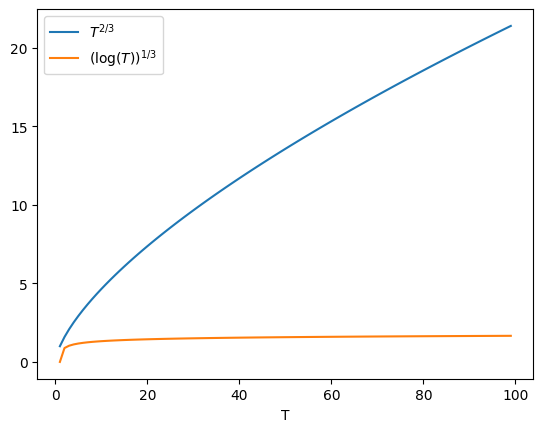

In [16]:
xs = np.arange(1, 100, 1)

ys1 = xs ** (2 / 3)

ys2 = np.log(xs) ** (1 / 3)

plt.xlabel("T")
plt.plot(xs, ys1, label='$T^{2/3}$')
plt.plot(xs, ys2, label='$(\log(T))^{1/3}$')
plt.legend()

# Compare bound of diff algorithms

Note, we're only comparing $R(t=T)$, i.e. regret at the final round of arm pulling.

* Epsilon-greedy: $O\left( t^{\frac{2}{3}}(\log t)^{\frac{1}{3}} \right)$
* Successive elimination: $O\left(\sqrt{t \log T} \right)$

In [18]:
def epsilon_greedy(t):
    return t ** (2 / 3) * np.log(t) ** (1 / 3)

In [19]:
def successive_elimination(t):
    return np.sqrt(t * np.log(t))

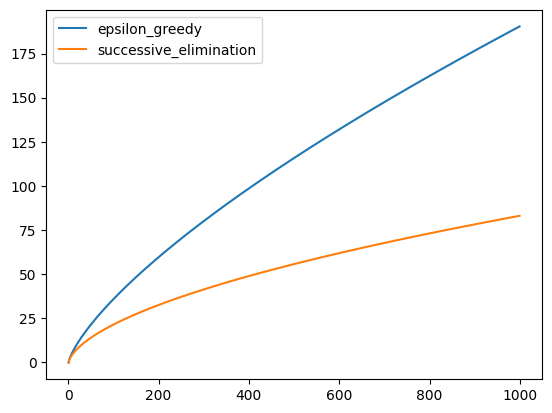

In [21]:
ts = np.arange(1, 1000, 1)

plt.plot(ts, epsilon_greedy(ts), label='epsilon_greedy')
plt.plot(ts, successive_elimination(ts), label='successive_elimination')
plt.legend()